In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler

import tsfel

In [17]:
# Load provided features
X_train = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\train\y_train.txt", header=None).values.ravel()
X_test = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt", delim_whitespace=True, header=None)
y_test = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\test\y_test.txt", header=None).values.ravel()

C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\2714548088.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\train\X_train.txt", delim_whitespace=True, header=None)
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\2714548088.py:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\test\X_test.txt", delim_whitespace=True, header=None)


In [18]:
X_train.shape , y_train.shape, X_test.shape, y_test.shape

((7352, 561), (7352,), (2947, 561), (2947,))

In [19]:
# Load activity labels
activity_labels = pd.read_csv(r"UCI HAR Dataset\UCI HAR Dataset\activity_labels.txt",
                              sep='\s+', header=None, index_col=0)[1].to_dict()

print(activity_labels)


{1: 'WALKING', 2: 'WALKING_UPSTAIRS', 3: 'WALKING_DOWNSTAIRS', 4: 'SITTING', 5: 'STANDING', 6: 'LAYING'}


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\3946443044.py:3: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None, index_col=0)[1].to_dict()


In [20]:
from sklearn.decomposition import PCA




**PROVIDED FEATURES**

Decision Tree (Provided Features):
Accuracy: 0.8622
Precision: 0.8633
Recall: 0.8622


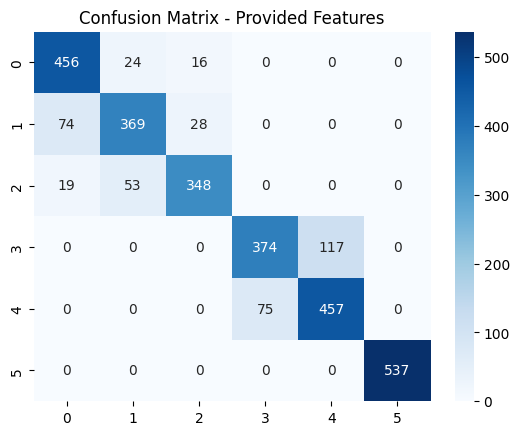

In [21]:
# [6]
# -----------------------------
# 1. Decision Tree using provided features
# -----------------------------

dt_provided = DecisionTreeClassifier(random_state=42)
dt_provided.fit(X_train, y_train)

y_pred_provided = dt_provided.predict(X_test)

acc_provided = accuracy_score(y_test, y_pred_provided)
prec_provided = precision_score(y_test, y_pred_provided, average='weighted')
rec_provided = recall_score(y_test, y_pred_provided, average='weighted')
cm_provided = confusion_matrix(y_test, y_pred_provided)

print("Decision Tree (Provided Features):")
print(f"Accuracy: {acc_provided:.4f}")
print(f"Precision: {prec_provided:.4f}")
print(f"Recall: {rec_provided:.4f}")

sns.heatmap(cm_provided, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Provided Features")
plt.show()


**RAW ACCELEROMETER**

<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
<>:16: SyntaxWarning: invalid escape sequence '\s'
<>:20: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\3678169875.py:16: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\3678169875.py:20: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


Raw accelerometer shape: (7352, 384) (2947, 384)
Decision Tree (Raw Accelerometer Data):
Accuracy: 0.7058
Precision: 0.7065
Recall: 0.7058


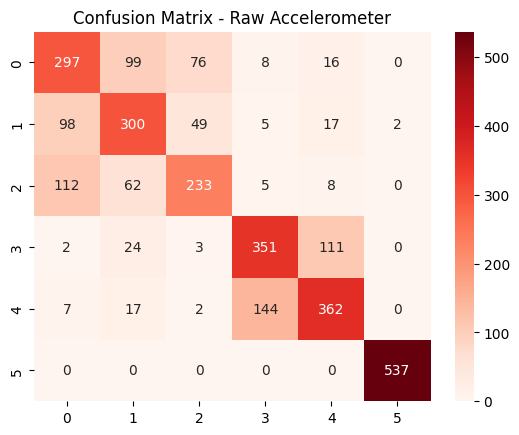

In [22]:
# [7]
# -----------------------------
# 2. Decision Tree using raw accelerometer data
# -----------------------------
# Load raw signals (accelerometer only, total_acc_x, y, z)
# Each file = (samples, 128 readings per window)

import os

signal_types = ["total_acc_x", "total_acc_y", "total_acc_z"]
X_train_raw, X_test_raw = [], []

for signal in signal_types:
    X_train_raw.append(
        pd.read_csv(f"UCI HAR Dataset/UCI HAR Dataset/train/Inertial Signals/{signal}_train.txt",
                    sep='\s+', header=None)
    )
    X_test_raw.append(
        pd.read_csv(f"UCI HAR Dataset/UCI HAR Dataset/test/Inertial Signals/{signal}_test.txt",
                    sep='\s+', header=None)
    )

# Concatenate all 3 axes
X_train_raw = pd.concat(X_train_raw, axis=1)
X_test_raw = pd.concat(X_test_raw, axis=1)

print("Raw accelerometer shape:", X_train_raw.shape, X_test_raw.shape)

# Train Decision Tree
dt_raw = DecisionTreeClassifier(random_state=42)
dt_raw.fit(X_train_raw, y_train)
y_pred_raw = dt_raw.predict(X_test_raw)

acc_raw = accuracy_score(y_test, y_pred_raw)
prec_raw = precision_score(y_test, y_pred_raw, average='weighted')
rec_raw = recall_score(y_test, y_pred_raw, average='weighted')
cm_raw = confusion_matrix(y_test, y_pred_raw)

print("Decision Tree (Raw Accelerometer Data):")
print(f"Accuracy: {acc_raw:.4f}")
print(f"Precision: {prec_raw:.4f}")
print(f"Recall: {rec_raw:.4f}")

sns.heatmap(cm_raw, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix - Raw Accelerometer")
plt.show()


Here by using raw accelarometer data  we get good accuracy in class 6 and overall great accuracy of 0.70508


In [23]:
# [8] Load raw inertial signals (example for one axis)
# These files are in train/Inertial Signals/ and test/Inertial Signals/

# Example: Body acceleration in X direction
acc_x_train = pd.read_csv(r'UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals/body_acc_x_train.txt',
                          sep='\s+', header=None)
acc_x_test = pd.read_csv(r'UCI HAR Dataset\UCI HAR Dataset\test\Inertial Signals/body_acc_x_test.txt',
                         sep='\s+', header=None)

print("acc_x_train shape:", acc_x_train.shape)  # (7352, 128)
print("acc_x_test shape:", acc_x_test.shape)    # (2947, 128)


<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\594932989.py:6: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\594932989.py:8: SyntaxWarning: invalid escape sequence '\s'
  sep='\s+', header=None)


acc_x_train shape: (7352, 128)
acc_x_test shape: (2947, 128)


In [24]:
import pandas as pd

# Each row = 1 sample, each column = 1 timestep
acc_train_x = pd.read_csv(r'UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals/body_acc_x_train.txt', sep='\s+', header=None)
acc_train_y = pd.read_csv(r'UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals/body_acc_y_train.txt', sep='\s+', header=None)
acc_train_z = pd.read_csv(r'UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals/body_acc_z_train.txt', sep='\s+', header=None)

acc_test_x = pd.read_csv(r'UCI HAR Dataset\UCI HAR Dataset\test\Inertial Signals\body_acc_x_test.txt', sep='\s+', header=None)
acc_test_y = pd.read_csv(r'UCI HAR Dataset\UCI HAR Dataset\test\Inertial Signals\body_acc_y_test.txt', sep='\s+', header=None)
acc_test_z = pd.read_csv(r'UCI HAR Dataset\UCI HAR Dataset\test\Inertial Signals\body_acc_z_test.txt', sep='\s+', header=None)


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:5: SyntaxWarning: invalid escape sequence '\s'
<>:6: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:9: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\3207201598.py:4: SyntaxWarning: invalid escape sequence '\s'
  acc_train_x = pd.read_csv(r'UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals/body_acc_x_train.txt', sep='\s+', header=None)
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\3207201598.py:5: SyntaxWarning: invalid escape sequence '\s'
  acc_train_y = pd.read_csv(r'UCI HAR Dataset\

In [25]:


train_path = r'UCI HAR Dataset\UCI HAR Dataset\train\Inertial Signals'
test_path  = r'UCI HAR Dataset\UCI HAR Dataset\test\Inertial Signals'

axes = ['body_acc_x', 'body_acc_y', 'body_acc_z']

# Load all axes
acc_train = [pd.read_csv(f'{train_path}/{ax}_train.txt', sep='\s+', header=None) for ax in axes]
acc_test  = [pd.read_csv(f'{test_path}/{ax}_test.txt', sep='\s+', header=None) for ax in axes]

print("Training shapes:", [df.shape for df in acc_train])
print("Testing shapes:", [df.shape for df in acc_test])

#


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:8: SyntaxWarning: invalid escape sequence '\s'
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\3067153851.py:7: SyntaxWarning: invalid escape sequence '\s'
  acc_train = [pd.read_csv(f'{train_path}/{ax}_train.txt', sep='\s+', header=None) for ax in axes]
C:\Users\vansh\AppData\Local\Temp\ipykernel_4364\3067153851.py:8: SyntaxWarning: invalid escape sequence '\s'
  acc_test  = [pd.read_csv(f'{test_path}/{ax}_test.txt', sep='\s+', header=None) for ax in axes]


Training shapes: [(7352, 128), (7352, 128), (7352, 128)]
Testing shapes: [(2947, 128), (2947, 128), (2947, 128)]


**TSFEL**

In [26]:
import tsfel
cfg = tsfel.get_features_by_domain("temporal")


In [38]:
import numpy as np
import pandas as pd

def extract_axis_features(series: pd.Series) -> pd.Series:
    """Extract basic statistical features from one axis of accelerometer data"""
    return pd.Series({
        "mean": series.mean(),
        "std": series.std(),
        "min": series.min(),
        "max": series.max(),
        "median": series.median(),
        "energy": np.sum(series**2) / len(series),   # signal energy
    })

def extract_all_axes(acc_list):
    # acc_list = [x_axis_df, y_axis_df, z_axis_df]
    all_feats = []
    axis_names = ["x", "y", "z"]
    for axis_name, df in zip(axis_names, acc_list):
        feats = extract_axis_features(df.squeeze())  # ensure it's a Series
        # Add prefix (x_, y_, z_) to avoid duplicate col names
        feats.index = [f"{axis_name}_{col}" for col in feats.index]
        all_feats.append(feats)
    return pd.DataFrame([pd.concat(all_feats)])  # single row of features


In [39]:
import joblib

# Training features
X_train_feats = extract_all_axes(acc_train)

# Testing features
X_test_feats = extract_all_axes(acc_test)

print("Feature shapes:", X_train_feats.shape, X_test_feats.shape)


Feature shapes: (1, 18) (1, 18)


c:\Users\vansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\vansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\vansh\AppData\Local\Programs\Python\Python313\Lib\site-packages\numpy\_core\fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the 

In [40]:
# Train Decision Tree on TSFEL features
dt_tsfel = DecisionTreeClassifier(random_state=42)
dt_tsfel.fit(X_train_feats, y_train)

# Predictions
y_pred_tsfel = dt_tsfel.predict(X_test_feats)

# Metrics
print("Accuracy:", accuracy_score(y_test, y_pred_tsfel))
print("Precision:", precision_score(y_test, y_pred_tsfel, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_tsfel, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_tsfel))


ValueError: setting an array element with a sequence.

In [ ]:
# Confusion matrix, precision, recall
from sklearn.metrics import classification_report

y_pred_tsfel = dt_tsfel.predict(X_test_feats)

print("Classification Report (TSFEL features):\n")
print(classification_report(y_test, y_pred_tsfel))

print("Confusion Matrix (TSFEL features):\n")
cm = confusion_matrix(y_test, y_pred_tsfel)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TSFEL Features')
plt.show()


ValueError: setting an array element with a sequence.

TSFEL featurization peformed good on class 1,2,3 but struggled on 4,5,6 overall accuracy was 0.58


In [ ]:
def apply_pca(X_train, X_test, n_components=50):
    """
    Apply PCA to dataset X and return reduced train/test features.
    """
    pca = PCA(n_components=n_components, random_state=42)
    X_train_reduced = pca.fit_transform(X_train)
    X_test_reduced = pca.transform(X_test)
    print(f"Explained variance ratio (first {n_components} comps): {np.sum(pca.explained_variance_ratio_):.2f}")
    return X_train_reduced, X_test_reduced

In [ ]:
def train_and_evaluate(X_train, X_test, y_train, y_test, description="Model"):
    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_test, y_pred, average='weighted', zero_division=0)
    cm = confusion_matrix(y_test, y_pred)

    print(f"\n===== {description} =====")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print("Confusion Matrix:\n", cm)
    print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

    return acc, prec, rec

In [ ]:
def depth_vs_accuracy(X_train, X_test, y_train, y_test, description="Model"):
    depths = range(2, 9)
    scores = []

    for d in depths:
        clf = DecisionTreeClassifier(max_depth=d, random_state=42)
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        scores.append(accuracy_score(y_test, y_pred))

    plt.plot(depths, scores, marker='o', label=description)

Explained variance ratio (first 50 comps): 0.97

===== Raw Accelerometer + PCA =====
Accuracy: 0.7411
Precision: 0.7437
Recall: 0.7411
Confusion Matrix:
 [[287 133  62   7   7   0]
 [111 282  49  24   5   0]
 [ 50  58 294   8  10   0]
 [  2  19   1 381  88   0]
 [  5  16   0  91 420   0]
 [ 15   0   0   1   1 520]]
Classification Report:
               precision    recall  f1-score   support

           1       0.61      0.58      0.59       496
           2       0.56      0.60      0.58       471
           3       0.72      0.70      0.71       420
           4       0.74      0.78      0.76       491
           5       0.79      0.79      0.79       532
           6       1.00      0.97      0.98       537

    accuracy                           0.74      2947
   macro avg       0.74      0.74      0.74      2947
weighted avg       0.74      0.74      0.74      2947


===== TSFEL Features =====
Accuracy: 0.5762
Precision: 0.5819
Recall: 0.5762
Confusion Matrix:
 [[423  45  28   0  

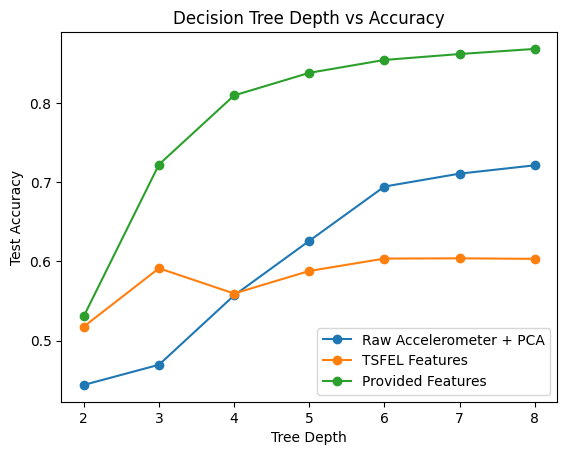

In [ ]:
# 1. Raw Accelerometer (PCA)
X_train_raw_pca, X_test_raw_pca = apply_pca(X_train_raw, X_test_raw, n_components=50)
train_and_evaluate(X_train_raw_pca, X_test_raw_pca, y_train, y_test, "Raw Accelerometer + PCA")
depth_vs_accuracy(X_train_raw_pca, X_test_raw_pca, y_train, y_test, "Raw Accelerometer + PCA")

# 2. TSFEL Features
train_and_evaluate(X_train_feats, X_test_feats, y_train, y_test, "TSFEL Features")
depth_vs_accuracy(X_train_feats, X_test_feats, y_train, y_test, "TSFEL Features")

# 3. Provided Features
train_and_evaluate(X_train, X_test, y_train, y_test, "Provided Features")
depth_vs_accuracy(X_train, X_test, y_train, y_test, "Provided Features")

# Final plot
plt.xlabel("Tree Depth")
plt.ylabel("Test Accuracy")
plt.title("Decision Tree Depth vs Accuracy")
plt.legend()
plt.show()

Overall, the model performance varied significantly across the three feature sets. The provided features achieved the highest accuracy of 86%, with consistently strong precision and recall across all classes, indicating that they are highly discriminative and well-engineered for the task. The raw accelerometer data with PCA performed moderately, reaching 74% accuracy; it captured most of the variance and performed well on some classes, especially class 6, but showed confusion among similar classes. TSFEL features performed the worst, with only 58% accuracy, struggling particularly with classes 4, 5, and 6, suggesting that the handcrafted temporal and statistical features were insufficient to capture the full complexity of the motions. Overall, the results highlight the importance of carefully designed feature engineering in achieving robust classification performance.
